# Basis function

/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_49305/1688823016.py:41: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_49305/1688823016.py:41: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_49305/1688823016.py:41: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_49305/1688823016.py:41: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_49305/1688823016.py:41: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_49305/1688823016.py:41: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx

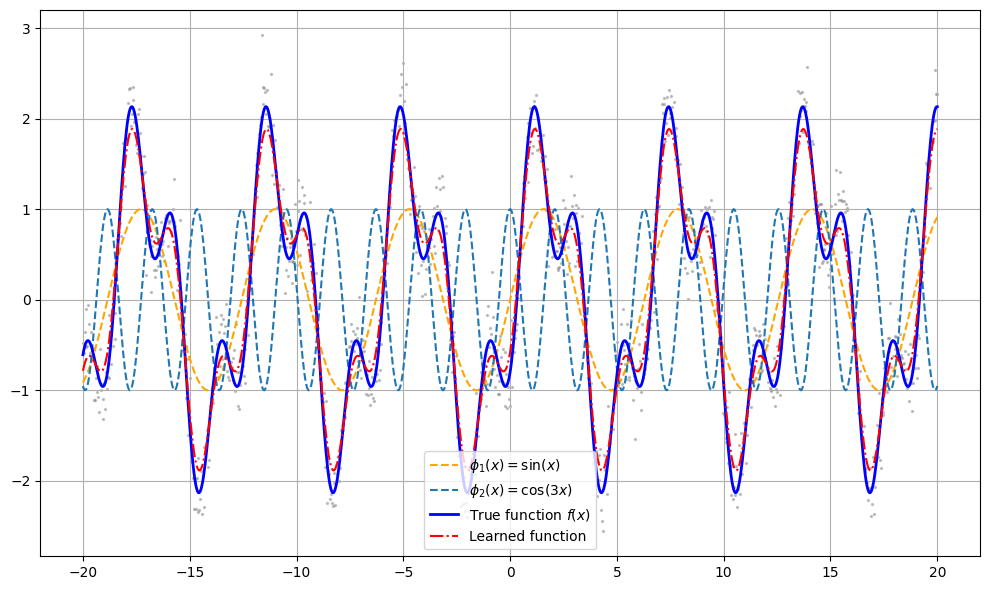

In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Fix seed
np.random.seed(42)

# Input values
x = np.linspace(-20, 20, 1000).reshape(-1, 1)

# Define two complex basis functions
def phi_1(x): return np.sin(x)
def phi_2(x): return np.cos(3 * x)

# True weights for linear combination
w_true = np.array([1.5, -0.8])

# True function (target): linear combination of phi_1 and phi_2
f1 = phi_1(x)
f2 = phi_2(x)
f_true = w_true[0] * f1 + w_true[1] * f2
y = f_true.ravel()

# Add noise
y_noisy = y + np.random.normal(0, 0.25, size=y.shape)

# Create design matrix
X_basis = np.hstack([f1, f2])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_basis, y_noisy, test_size=0.2, random_state=42)

# Train the model (just right)
def train(X_train, y_train, X_test, y_test, epochs=200, lr=0.01):
    w = np.random.randn(2)
    train_losses, test_losses = [], []

    for _ in range(epochs):
        y_pred_train = X_train @ w
        y_pred_test = X_test @ w
        train_losses.append(mean_squared_error(y_train, y_pred_train))
        test_losses.append(mean_squared_error(y_test, y_pred_test))
        grad = 2 * X_train.T @ (y_pred_train - y_train) / len(y_train)
        w -= lr * grad

    return w, train_losses, test_losses

w_learned, _, _ = train(X_train, y_train, X_test, y_test)

# Predict full learned function
f_learned = X_basis @ w_learned

# === Plot all components ===
plt.figure(figsize=(10, 6))
plt.plot(x, f1, label=r"$\phi_1(x) = \sin(x)$", linestyle="--", color="orange")
plt.plot(x, f2, label=r"$\phi_2(x) = \cos(3x)$", linestyle="--")
plt.plot(x, y, label="True function $f(x)$", color="blue", linewidth=2)
plt.plot(x, f_learned, label="Learned function", color="red", linestyle="-.")

plt.scatter(x, y_noisy, color="gray", s=2, alpha=0.4)
plt.legend(loc="lower center")
plt.grid(True)
plt.tight_layout()
plt.savefig("1_ml_pdf/basis_function_decomposition.pdf")
plt.show()

# Overfitting, underfitting

In [48]:
configs = {
    "underfit": {"epochs": 50, "lr": 0.001},
    "just_right": {"epochs": 200, "lr": 0.005},
    "overfit": {"epochs": 1000, "lr": 0.01}
}

results = {}

for name, cfg in configs.items():
    w, train_losses, test_losses = train(X_train, y_train, X_test, y_test, **cfg)
    results[name] = {
        "weights": w,
        "train_loss": train_losses,
        "test_loss": test_losses,
        "pred": X_basis @ w
    }

/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: divide by zero encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: overflow encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_30587/297806958.py:40: RuntimeWarning: invalid value encountered in matmul
  y_pred_train = X_train @ w
/var/folders/8h/y333g1hx033_ks

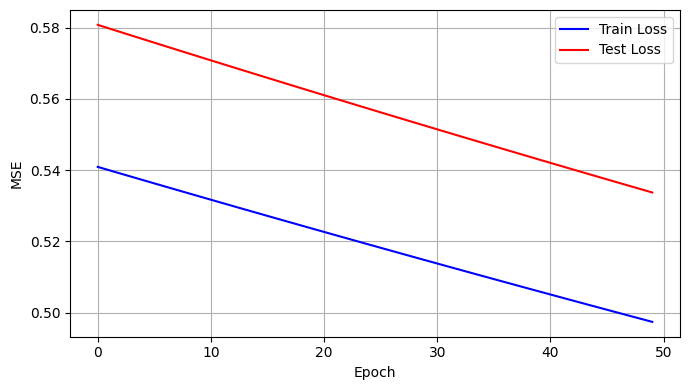

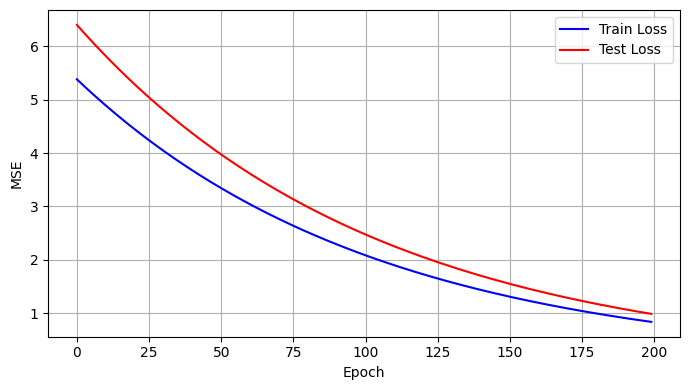

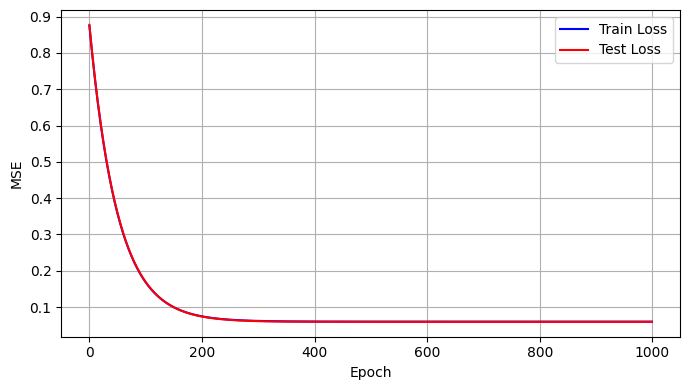

In [ ]:
for name in ["underfit", "just_right", "overfit"]:
    plt.figure(figsize=(7, 4))
    plt.plot(results[name]["train_loss"], label="Train Loss", color="blue")
    plt.plot(results[name]["test_loss"], label="Test Loss", color="red")
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"1_ML_pdf/basis_loss_{name}.pdf")
    plt.show()

# Loss

<>:14: SyntaxWarning: invalid escape sequence '\h'
<>:14: SyntaxWarning: invalid escape sequence '\h'
/var/folders/8h/y333g1hx033_ksxpkb1f19p00000gn/T/ipykernel_49305/2076100315.py:14: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('Predicted Probability $\hat{y}$')


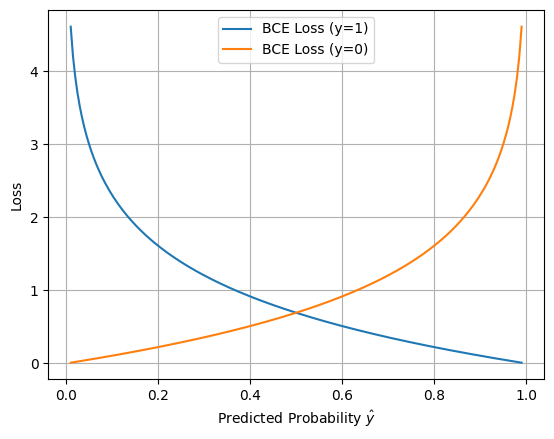

In [17]:
import os 

output_dir = '1_ml_pdf'
os.makedirs(output_dir, exist_ok=True)

# 1) Binary Cross-Entropy Loss Illustration
p = np.linspace(0.01, 0.99, 200)       # Predicted probability for y=1
bce_y1 = -np.log(p)                    # BCE loss when true label y=1
bce_y0 = -np.log(1 - p)                # BCE loss when true label y=0

plt.figure()
plt.plot(p, bce_y1, label='BCE Loss (y=1)')
plt.plot(p, bce_y0, label='BCE Loss (y=0)')
plt.xlabel('Predicted Probability $\hat{y}$')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

output_path = os.path.join(output_dir, 'cross_e.pdf')
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()

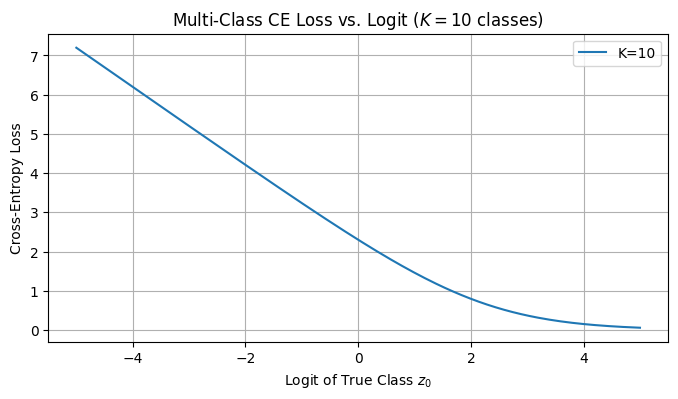

Saved figure to 1_ml_pdf/multi_class_ce_10_classes.pdf


In [13]:
# Parameters
K = 10  # number of classes
z_true = np.linspace(-5, 5, 200)  # varying logit for the true class
# assume all other logits are zero
logits = np.zeros((200, K))
logits[:, 0] = z_true  # true class is index 0

exp_logits = np.exp(logits)
probs = exp_logits / exp_logits.sum(axis=1, keepdims=True)
p_true = probs[:, 0]

loss = -np.log(p_true)

plt.figure(figsize=(8, 4))
plt.plot(z_true, loss, label=f'K={K}')
plt.xlabel('Logit of True Class $z_0$')
plt.ylabel('Cross-Entropy Loss')
plt.title(f'Multi-Class CE Loss vs. Logit ($K={K}$ classes)')
plt.legend()
plt.grid(True)

output_path = os.path.join(output_dir, 'multi_class_ce_10_classes.pdf')
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()

print(f"Saved figure to {output_path}")

Sigmoid

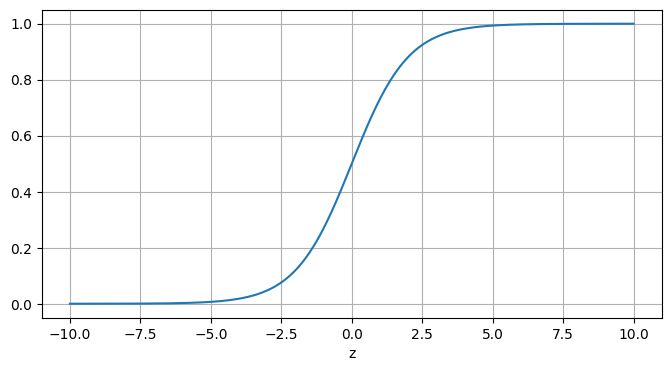

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate input values
z = np.linspace(-10, 10, 400)
s = sigmoid(z)

# Plot the sigmoid function
plt.figure(figsize=(8, 4))
plt.plot(z, s, label='sigmoid(z)')
plt.xlabel('z')
plt.grid(True)
output_path = os.path.join(output_dir, 'sigmoid.pdf')
plt.savefig(output_path, format='pdf', bbox_inches='tight')
plt.show()

# Mean Squared Error

In [ ]:
from pathlib import Path
from typing import Sequence

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


def create_mse_pdf(
    y_true: Sequence[float],
    y_pred: Sequence[float],
    output_path: str | Path = "mse_detailed_visualization.pdf",
) -> None:
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)

    if y_true.shape != y_pred.shape:
        raise ValueError("`y_true` and `y_pred` must have identical shapes")

    errors = y_pred - y_true
    squared_error = errors**2
    mse = squared_error.mean()

    output_path = Path(output_path).expanduser().absolute()
    output_path.parent.mkdir(parents=True, exist_ok=True)

    with PdfPages(output_path) as pdf:
        fig1, ax1 = plt.subplots(figsize=(6, 6))

        ax1.scatter(y_true, y_pred, s=squared_error * 20, label="Predicted vs. True")

        # ideal 45° line
        ax1.plot(
            [y_true.min(), y_true.max()],
            [y_true.min(), y_true.max()],
            "--",  # dashed style
            label="Ideal: y = x",
        )

        for x, y_t, y_p in zip(y_true, y_true, y_pred, strict=True):
            ax1.plot([x, x], [y_t, y_p], color="gray", linewidth=0.8)

        ax1.set_xlabel("True Values")
        ax1.set_ylabel("Predicted Values")
        ax1.grid(True)
        fig1.tight_layout()
        pdf.savefig(fig1)
        plt.close(fig1)


    print(f"[OK] PDF saved to {output_path}")


rng = np.random.default_rng(seed=0)
y_true_demo = np.linspace(0, 10, 20)
y_pred_demo = y_true_demo + rng.normal(scale=2.0, size=y_true_demo.shape)

create_mse_pdf(y_true_demo, y_pred_demo)

[OK] PDF saved to /Users/rob/github/phd_support/mse_detailed_visualization.pdf


# Cross_entropy n > 2

[OK] PDF saved to /Users/rob/github/phd_support/softmax_curve.pdf


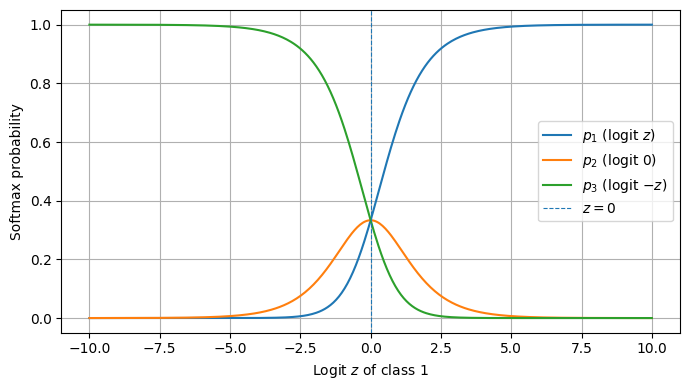

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# --- Utility: numerically stable softmax -----------------------------------
def softmax(logits: np.ndarray) -> np.ndarray:
    e = np.exp(logits - np.max(logits, axis=0))
    return e / e.sum(axis=0)

# --- Example setup ----------------------------------------------------------
x = np.linspace(-10, 10, 400)          # sweep the first logit
logits = np.vstack([x,                 # class 1:  z
                    np.zeros_like(x),  # class 2:  0
                    -x])               # class 3: -z
probs = softmax(logits)                # shape (3, len(x))

# --- Plot -------------------------------------------------------------------
plt.figure(figsize=(7, 4))
plt.plot(x, probs[0], label=r"$p_1$ (logit $z$)")
plt.plot(x, probs[1], label=r"$p_2$ (logit $0$)")
plt.plot(x, probs[2], label=r"$p_3$ (logit $-z$)")
plt.axvline(0, linestyle="--", linewidth=0.8, label=r"$z=0$")
plt.xlabel(r"Logit $z$ of class 1")
plt.ylabel("Softmax probability")
plt.legend()
plt.grid(True)
plt.tight_layout()

# --- Save as PDF ------------------------------------------------------------
out = Path("softmax_curve.pdf").resolve()
plt.savefig(out)
print(f"[OK] PDF saved to {out}")

# Neural Network

Initial weights:
Input to Hidden:
 [[ 0.05963037 -0.64693678  0.69822331]
 [ 0.39348539  0.89519322  0.6351718 ]]

Hidden to Output:
 [[ 1.04955272]
 [-0.53523521]
 [ 1.31739407]]

Training the neural network on XOR problem...
Epoch 0, Loss: 0.3154
Epoch 1000, Loss: 0.2046
Epoch 2000, Loss: 0.0524
Epoch 3000, Loss: 0.0131
Epoch 4000, Loss: 0.0065
Epoch 5000, Loss: 0.0042
Epoch 6000, Loss: 0.0030
Epoch 7000, Loss: 0.0024
Epoch 8000, Loss: 0.0019
Epoch 9000, Loss: 0.0016

Predictions after training:
Input: [0 0] -> Prediction: 0.0199 (Target: 0)
Input: [0 1] -> Prediction: 0.9622 (Target: 1)
Input: [1 0] -> Prediction: 0.9622 (Target: 1)
Input: [1 1] -> Prediction: 0.0484 (Target: 0)


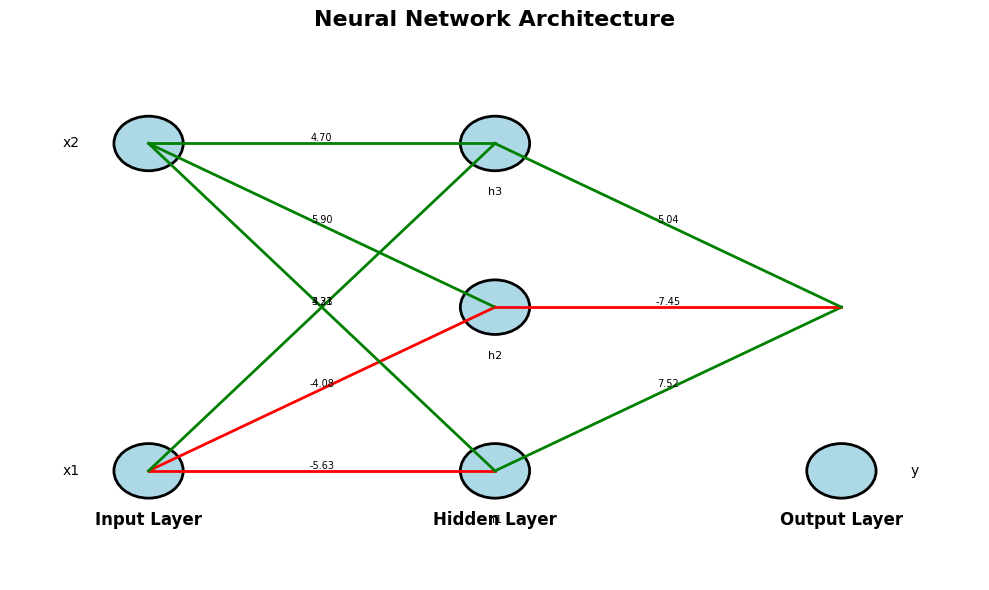

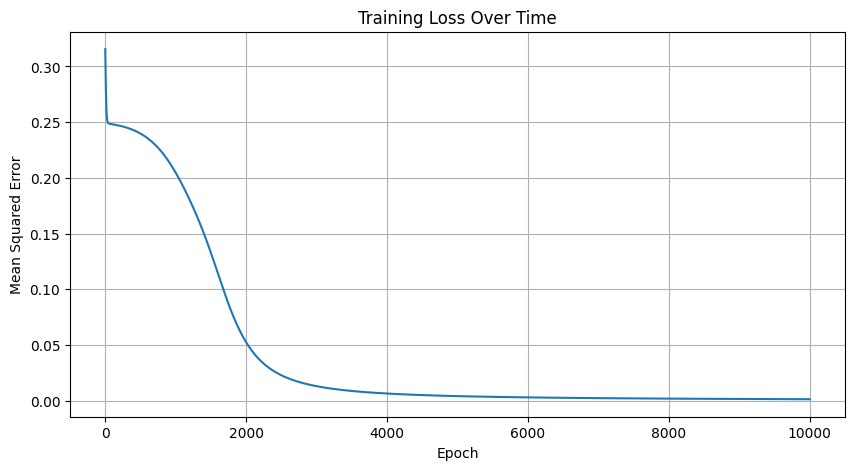


Activations for input [1 0]:
Input layer: [1 0]
Hidden layer: [0.00130198 0.08410844 0.96664738]
Output layer: [0.9621986]


In [25]:
# --------------------------------------------------------------
# Grid-plot of six activation functions (2 × 3) and save as PDF
# --------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf          # <- NEW

# x-axis
x = np.linspace(-6, 6, 1_000)

# ---------- activations ----------
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

def leaky_relu(z, alpha=0.1):
    return np.where(z > 0, z, alpha * z)

def elu(z, alpha=1.0):
    return np.where(z > 0, z, alpha * (np.exp(z) - 1))

def gelu(z):
    return 0.5 * z * (1 + erf(z / np.sqrt(2)))   # exact formulation

activations = [
    ("Sigmoid",    sigmoid),
    ("tanh",       tanh),
    ("ReLU",       relu),
    ("Leaky ReLU", leaky_relu),
    ("ELU",        elu),
    ("GELU",       gelu),
]

# ---------- colour palette (no yellow) ----------
palette = ["#1f77b4",  # blue
           "#2ca02c",  # green
           "#d62728",  # red
           "#9467bd",  # purple
           "#8c564b",  # brown
           "#17becf"]  # cyan

# ---------- plot grid ----------
fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True)
axes = axes.ravel()

for idx, (name, func) in enumerate(activations):
    ax = axes[idx]
    ax.plot(x, func(x), color=palette[idx], linewidth=2)
    ax.axhline(0, color="gray", linewidth=0.5)
    ax.axvline(0, color="gray", linewidth=0.5)
    ax.set_xlabel(r"$z$")
    ax.set_ylabel(rf"${name}(z)$")
    ax.set_xlim(-6, 6)
    # y-limits wide enough for extra-leaky branch
    ax.set_ylim(-1.5, 6) if name in {"ReLU", "Leaky ReLU"} else ax.set_ylim(-1.2, 1.2)

# hide any unused subplot frame
for extra_ax in axes[len(activations):]:
    extra_ax.axis("off")

plt.tight_layout()
plt.savefig("activation_grid.pdf", bbox_inches="tight")
plt.close()